In [1]:
import sys
sys.path.insert(0, '..')

%load_ext tools.prov_magics
import tools.view.prov_dictionary
from tools.query.prov_dictionary import *

In [2]:
def wdf_text(e2, e1, a, attrs):
    return querier.text("wasDerivedFrom", [e2, e1, a], attrs=dict(attrs), id_=None)

def neighborhood(ent, result):
    A, O, AT, TX = var("A O AT TX")
    for __ in wasDerivedFrom(ent, O, A, attrs=AT) & entity(O, TX):
        result.add(wdf_text(ent, O.bound, A.bound, AT.bound))
        result.add(TX.bound)
        yield O.bound

def dfs(ent, neigh):
    stack = [ent]
    visited = set()
    TX = var("TX")
    result = {TX.bound for _ in entity(ent, TX)} 

    while stack:
        ent = stack.pop()
        for other in neigh(ent, result):
            if other not in visited:
                visited.add(other)
                stack.append(other)
    return result



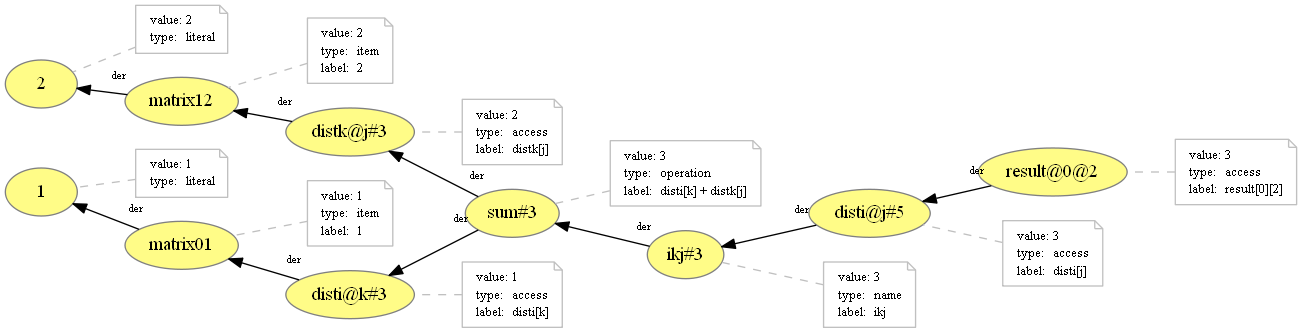

In [3]:
querier.load("../generated/prov_dictionary/floydwarshall.provn");
view = "provn png svg pdf"
get_ipython().run_cell_magic(
    "provn",
    "-o {} -e {} -r RL".format("../generated/prov_dictionary/query", view),
    '\n'.join(dfs("result@0@2", neighborhood))
)